In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('../../textdatasets.csv')


In [2]:
import math
df['logsize'] = df.apply(lambda row: math.log10(row['Tenorder']),axis=1)

In [3]:
df = df.sort_values('Year').reset_index()
df['dataset_id'] = np.arange(df.shape[0])+1

In [4]:
df.iloc[0:3]['Paper'] = ['IBM 1954','ELIZA','Computer Indexing']

/var/folders/3j/h2m619j17dl6rdy721s2phbm0000gn/T/ipykernel_51847/964087508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[0:3]['Paper'] = ['IBM 1954','ELIZA','Computer Indexing']


In [5]:

df.loc[df['Paper']=='20 NewsGroup dataset','Paper'] = '20 NewsGroup'


In [6]:
def jitter(values,j):
    return values + np.random.normal(j,0.1,values.shape)

In [7]:
df_new = df[~df.Numlabellers.isna()]

In [8]:
import matplotlib.pyplot as plt
import matplotlib.text as mpl_text

class AnyObject(object):
    def __init__(self, text, color):
        self.my_text = text
        self.my_color = color

class AnyObjectHandler(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch = mpl_text.Text(x=0, y=0, text=orig_handle.my_text, color=orig_handle.my_color, verticalalignment=u'baseline', 
                                horizontalalignment=u'left', multialignment=None, 
                                fontproperties=None, rotation=45, linespacing=None, 
                                rotation_mode=None)
        handlebox.add_artist(patch)
        return patch

obj_0 = AnyObject("1", "lightgray")


In [9]:
df=df[df.Year>=2009]
df.loc[df.Size=='570,000','Size']=570000
df.loc[df.Size=='400,000,000','Size']=400000000
df.loc[df.Size=='50,000','Size']=50000

df['Size'].values.astype(int)/df['Tenorder'].values.astype(int)

array([6.       , 1.4197122, 5.       , 5.7      , 2.02599  , 4.       ,
       2.3      , 5.7      , 4.       , 2.       ])

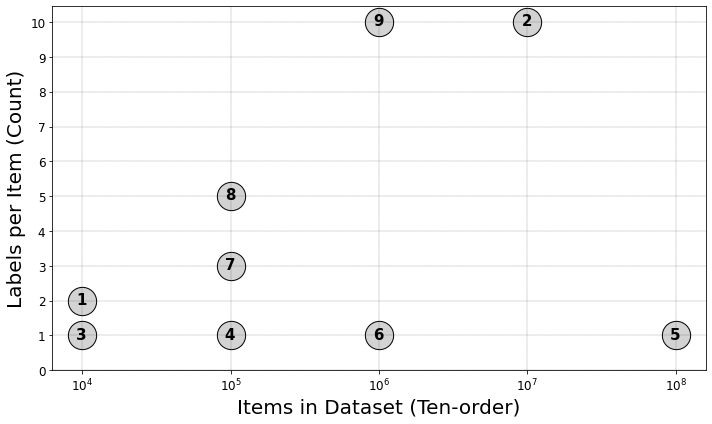

In [10]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
df=df[df.Year>=2009]
df=df[df.Paper!='SNLI']
df=df.sort_values('Year')
df['ind']=np.arange(df.shape[0])


axes=sns.scatterplot(
    data=df,
    x="logsize",
    y="Numlabellers",
    s=800,
    edgecolors='black',
    linewidth=1,
    edgecolor='black',
    color='lightgray',
    x_jitter=2,
    y_jitter=2,
)

x=df['logsize'].values
y=df['Numlabellers'].values
datasets=df['Paper'].values

for i, _ in enumerate(np.arange(df.shape[0])+1):
    txt=datasets[i]
    plt.annotate(df.iloc[i]['ind']+1, (x[i]-0.04, y[i]-0.1),fontsize=15, weight='bold')
plt.grid(True,color='black', linestyle='--', linewidth=0.2)

plt.xticks([4,5,6,7,8],[r"$10^{{ {:2d} }}$".format(i) for i in [4,5,6,7,8]],fontsize=12)
plt.yticks(np.arange(11),fontsize=12)

plt.xlabel('Items in Dataset (Ten-order)',fontsize=20)
plt.ylabel('Labels per Item (Count)',fontsize=20)
plt.tight_layout()
plt.savefig('../Figure 1a.png',dpi=600)

In [11]:
df

,index,Year,Paper,Size,Numlabellers,Tenorder,logsize,dataset_id,ind
7,16,2009,CIFAR-10,60000,2.0,10000,4.0,8,0
8,14,2010,Imagenet,14197122,10.0,10000000,7.0,9,1
9,6,2011,IMDB,50000,1.0,10000,4.0,10,2
11,15,2015,Celeb-A,202599,1.0,100000,5.0,12,3
12,9,2016,LAION-400M,400000000,1.0,100000000,8.0,13,4
13,10,2017,PubMed RCT,2300000,1.0,1000000,6.0,14,5
14,12,2018,e-SNLI,570000,3.0,100000,5.0,15,6
15,11,2019,MNLI,400000,5.0,100000,5.0,16,7
16,13,2020,CivilComments,2000000,10.0,1000000,6.0,17,8
